# Nagel-Schreckenberg Cellular Automata Model of Vehicular Traffic

After watching the traffic jam experiment done by the Japanese researchers, let us learn about a simple model of vehicular traffic that would reproduce salient features of the experiment.

This is a cellular automata model introduced by Kai Nagel and Michael Schreckenberg in 1992.

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Kainagel.jpg/440px-Kainagel.jpg" width=200>
    <figcaption>Kai Nagel</figcaption>
</figure>

<figure>
    <img src="https://www.uni-due.de/imperia/md/images/ptt/arbeitsgruppe/fittosize__1200_0_8fe8aeb0c2cf56b90e6ab152d8b06af9_schreckenberg_500n.jpg" width=200>
    <figcaption>Michael Schreckenberg</figcaption>
<figure>

In the Nagel-Schreckenberg (NS) model, a one-lane unidirectional road is divided into <em>cells</em> that are each between 6.0 m and 7.5 m long. Under safe driving conditions, each cell can only accommodate a single vehicle. In the simplest NS model, we do not distinguish between cars, buses, vans, or trucks. All vehicles are the same, and can have speeds $v = 0, 1, \dots, v_{\max}$. For the NS model to reproduce the Japanese experiment qualitatively, all we need is $v_{\max} = 2$.

Suppose at one instant in time $t$, we find $N < L$ vehicles along the road with $L$ cells. Suppose further that vehicle $0 \leq i \leq N-1$ is in the $(0 \leq x_i(t) \leq L-1)$th cell, and its instantaneous velocity is $0 \leq v_i(t) \leq v_{\max}$. Then the rules for updating the NS model are:
<ol>
    <li> <b>acceleration.</b> If $v_i(t) < v_{\max}$, $v_i(t) = v_i(t) + 1$;
    <li> <b>slowing down.</b> If vehicle $j$ is the vehicle just ahead of vehicle $i$, and $x_j(t) - x_i(t) \leq v_i(t)$, reduce the speed of vehicle $i$ to $v_i(t) = x_j(t) - x_i(t) - 1$ to avoid a collision;
    <li> <b>randomization.</b> If $v_i(t) > 0$, reduce the speed of vehicle $i$ to $v_i(t) = v_i(t) - 1$ with probability $p$;
    <li> <b>vehicle motion.</b> Move all vehicles forward, so that $x_i(t+1) = x_i(t) + v_i(t)$.
</ol>

The simplest way to simulate the NS model is to keep a list of the $N$ vehicles. But before we create this list of vehicles, let us specify the length of the road as:

In [55]:
# length of road
L = 100

Next, we specify the number of vehicles we want to simulate.

In [56]:
# number of vehicles
N = 25

Now, we can create the list of vehicles, at random positions along the road, and with random speeds.

However, if we do this by assigning the $N$ vehicles random positions, some vehicles might overlap. This would pose problems for the simulation.

Therefore, a safer way to initialize the positions of the $N$ vehicles is to start with $N$ gaps (the first gap being the gap between vehicle $i=0$ and cell $x = 0$ of the road). These gaps can be $1, 2, \dots, \lfloor L/N \rfloor$, so that no vehicle would have a position beyond the $L$ cells of the road.

In [57]:
# import numpy
import numpy as np
# create list of gaps
gaps = [ np.random.randint(1, 1 + L//N) for i in range(N) ]
# create list of positions
pos = [ 0 for i in range(N) ]
pos[0] = gaps[0]
for i in range(1, N):
    pos[i] = pos[i-1] + gaps[i]
# set vmax
vmax = 2
# create list of velocities
vel = [ np.random.randint(0, vmax+1) for i in range(N) ]

Another advantage of creating the positions this way, is that we know by default that the vehicle ahead of vehicle $i$ is vehicle $i+1$.

Let us see what we have right now.

In [58]:
print('i\t x[i]\t v[i]')
for i in range(N):
    print(repr(i) + '\t' + repr(pos[i]) + '\t' + repr(vel[i]))

i	 x[i]	 v[i]
0	3	1
1	4	2
2	6	1
3	9	0
4	11	0
5	14	1
6	17	2
7	21	2
8	24	0
9	26	1
10	30	1
11	31	1
12	35	0
13	37	1
14	38	1
15	42	1
16	43	0
17	44	0
18	47	1
19	49	1
20	52	1
21	56	0
22	60	2
23	61	2
24	62	2


To get familiar with the update rules, let us simulate the NS model for a single time step. To do this, we loop over the vehicles, and overwrite the arrays <code>pos</code> and <code>vel</code>, one rule at a time.

In [59]:
# specify p
p = 0.2
# for-loop over vehicles
for i in range(N):
    # acceleration
    if vel[i] < vmax:
        vel[i] = vel[i] + 1
    # slowing down
    if i < N-1:
        if vel[i] >= pos[i+1] - pos[i]:
            vel[i] = pos[i+1] - pos[i] - 1
    # impose periodic boundary condition on velocities
    else:
        if vel[i] >= (L - pos[i] - 1) + pos[0]:
            vel[i] = (L - pos[i] - 1) + pos[0] - 1
    # random deceleration
    if vel[i] >= 1:
        if np.random.rand() < p:
            vel[i] = vel[i] - 1
    # move vehicles
    pos[i] = pos[i] + vel[i]
    # impose periodic boundary condition on positions
    if pos[N-1] >= L:
        newpos0 = pos.pop(N-1)
        newvel0 = vel.pop(N-1)
        pos.insert(0, newpos0-L)
        vel.insert(0, newvel0)

Let us now see whether we have implemented the update rules correctly.

In [60]:
print('i\t x[i]\t v[i]')
for i in range(N):
    print(repr(i) + '\t' + repr(pos[i]) + '\t' + repr(vel[i]))

i	 x[i]	 v[i]
0	3	0
1	5	1
2	8	2
3	10	1
4	12	1
5	16	2
6	19	2
7	23	2
8	25	1
9	27	1
10	30	0
11	33	2
12	35	0
13	37	0
14	40	2
15	42	0
16	43	0
17	45	1
18	48	1
19	51	2
20	53	1
21	57	1
22	60	0
23	61	0
24	64	2


Before we go on to run longer simulations of the NS model, let us find a better way to visualize the traffic situation, instead of printing out the positions and velocities of the vehicles every time step.

Ultimately, we would not be showing the traffic situation at one time step, but would be showing the traffic over the entire simulation as a space-time diagram.

Before we can do this, we have to import the PyPlot module.

In [61]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

To plot the space-time diagram, we will use the <code>matshow()</code> function in PyPlot. The function <code>matshow()</code> takes a two-dimensional array as input. Therefore, after setting the number of time steps to simulate, we initialize the array <code>traffic</code> that would become the input of <code>matshow()</code>.

In [62]:
# set number of time steps to simulate
T = 50
# initialize traffic array
traffic = np.zeros((T,L))

Thereafter, we start a for-loop over the time steps, and within it a for-loop over the vehicles, to simulate the NS model. At the start of time step $t$, for vehicle $i$ at $x_i$, with velocity $v_i$, we will do the following:
<ol>
    <li> set <code>traffic[t, pos[i]] = 1</code> if $v_i = 0$;
    <li> set <code>traffic[t, pos[i]] = 2</code> if $v_i = 1$; and
    <li> set <code>traffic[t, pos[i]] = 3</code> if $v_i = 2$.
</ol>

In [63]:
# simulation proper
for t in range(T):
    # draw to traffic array
    for i in range(N):
        if vel[i] == 0:
            traffic[t, pos[i]] = 1
        elif vel[i] == 1:
            traffic[t, pos[i]] = 2
        else:
            traffic[t, pos[i]] = 3
    # update traffic
    for i in range(N):
        # acceleration
        if vel[i] < vmax:
            vel[i] = vel[i] + 1
        # slowing down
        if i < N-1:
            if vel[i] >= pos[i+1] - pos[i]:
                vel[i] = pos[i+1] - pos[i] - 1
        # impose periodic boundary condition on velocities
        else:
            if vel[i] >= (L - pos[i] - 1) + pos[0]:
                vel[i] = (L - pos[i] - 1) + pos[0] - 1
        # random deceleration
        if vel[i] >= 1:
            if np.random.rand() < p:
                vel[i] = vel[i] - 1
        # move vehicles
        pos[i] = pos[i] + vel[i]
        # impose periodic boundary condition on positions
        if pos[N-1] >= L:
            newpos0 = pos.pop(N-1)
            newvel0 = vel.pop(N-1)
            pos.insert(0, newpos0-L)
            vel.insert(0, newvel0)

Now that the simulation has been successfully completed, let us show the space-time diagram.

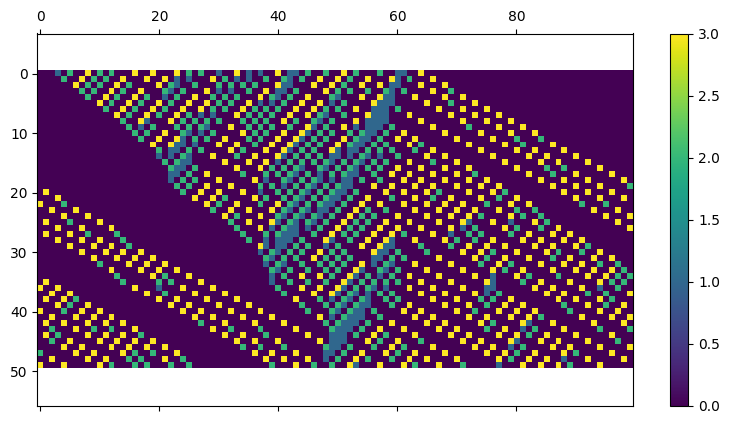

In [64]:
plt.matshow(traffic)
plt.colorbar()
plt.axis('equal')
plt.show()

As we can see,
<ol>
    <li> yellow cells represent vehicles moving at $v_{\max} = 2$;
    <li> some yellow cells become green ($v_i = 1$) because of random deceleration;
    <li> traffic jams (consisting of bunches of vehicles with zero velocity) form behind regions with too many random decelerations.
</ol>

# Additional Exercises

## Simulations at Different Densities

In the above simulation, we have $N = 25$ vehicles over a road with $L = 100$.

You should plot the space-time diagrams for simulations at different densities $N/L$ to gain an intuition into the behavior of the NS model.

In [52]:
def traffic_simulator00(N, L, vmax ,p ,T):
    import numpy as np
    import matplotlib.pyplot as plt
    # create list of gaps
    gaps = [ np.random.randint(1, 1 + L//N) for i in range(N) ]
    # create list of positions
    pos = [ 0 for i in range(N) ]
    pos[0] = gaps[0]
    for i in range(1, N):
        pos[i] = pos[i-1] + gaps[i]
    # create list of velocities
    vel = [ np.random.randint(0, vmax+1) for i in range(N) ]
    
    # initialize traffic array
    traffic = np.zeros((T,L))

        # simulation proper
    for t in range(T):
        # draw to traffic array
        for i in range(N):
            if vel[i] == 0:
                traffic[t, pos[i]] = 1
            elif vel[i] == 1:
                traffic[t, pos[i]] = 2
            else:
                traffic[t, pos[i]] = 3
        # update traffic
        for i in range(N):
            # acceleration
            if vel[i] < vmax:
                vel[i] = vel[i] + 1
            # slowing down
            if i < N-1:
                if vel[i] >= pos[i+1] - pos[i]:
                    vel[i] = pos[i+1] - pos[i] - 1
            # impose periodic boundary condition on velocities
            else:
                if vel[i] >= (L - pos[i] - 1) + pos[0]:
                    vel[i] = (L - pos[i] - 1) + pos[0] - 1
            # random deceleration
            if vel[i] >= 1:
                if np.random.rand() < p:
                    vel[i] = vel[i] - 1
            # move vehicles
            pos[i] = pos[i] + vel[i]
            # impose periodic boundary condition on positions
            if pos[N-1] >= L:
                newpos0 = pos.pop(N-1)
                newvel0 = vel.pop(N-1)
                pos.insert(0, newpos0-L)
                vel.insert(0, newvel0)
    #draw the plot
    plt.matshow(traffic)
    plt.colorbar()
    plt.axis('equal')
    plt.show()

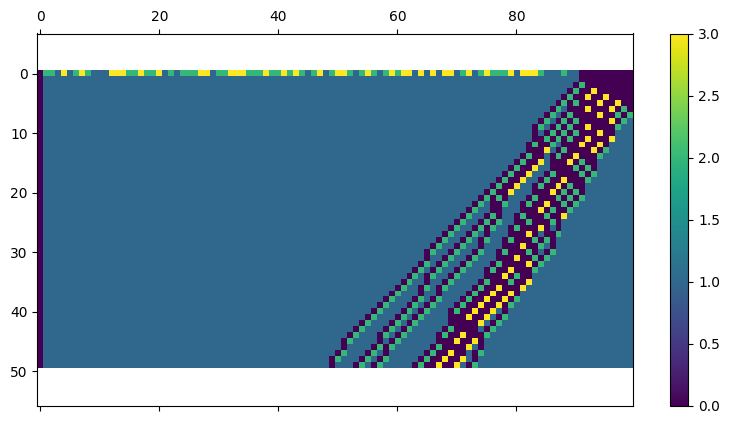

In [8]:
traffic_simulator00(90, 100, 2 ,0.2 ,50)

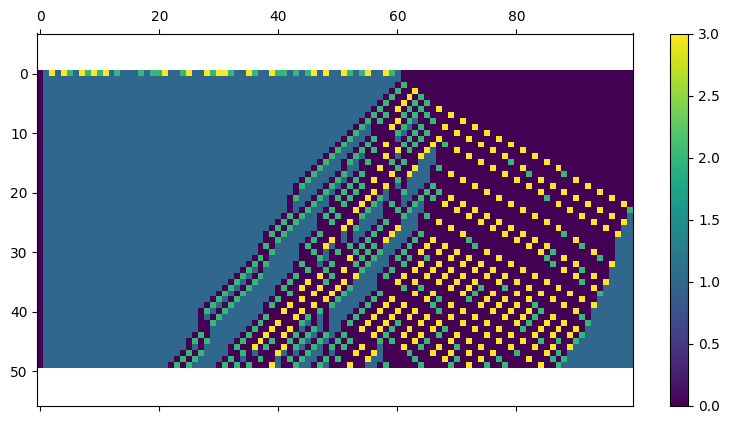

In [9]:
traffic_simulator00(60, 100, 2 ,0.2 ,50)

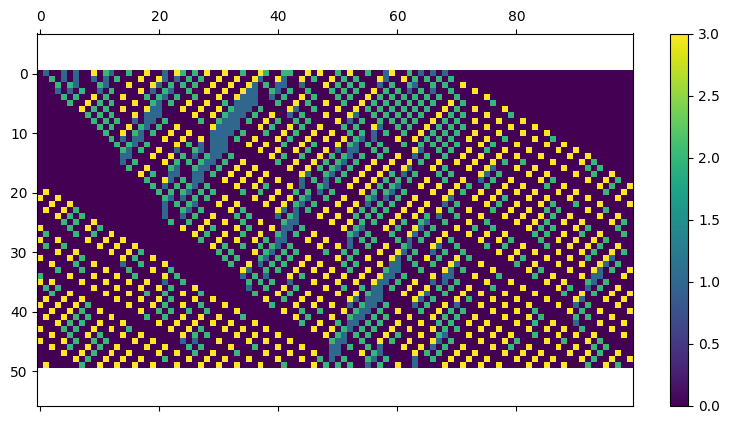

In [12]:
traffic_simulator00(30, 100, 2 ,0.2 ,50)

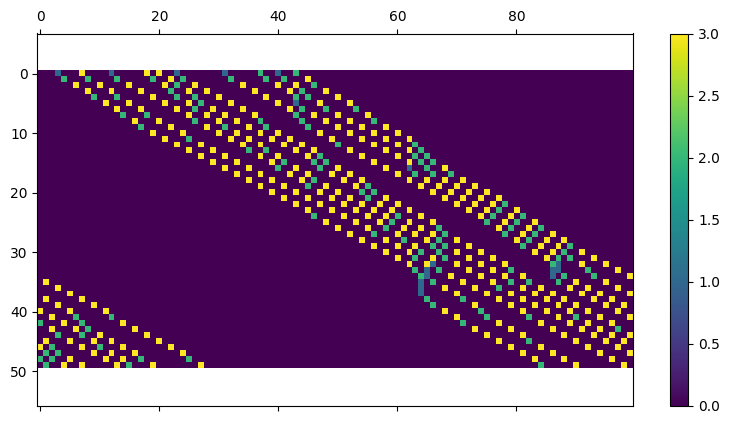

In [13]:
traffic_simulator00(10, 100, 2 ,0.2 ,50)

## Simulations with Different $v_{\max}$

In the above simulation, we used $v_{\max} = 2$.

Run simulations with other values of $v_{\max}$, to better understand the behavior of the NS model.

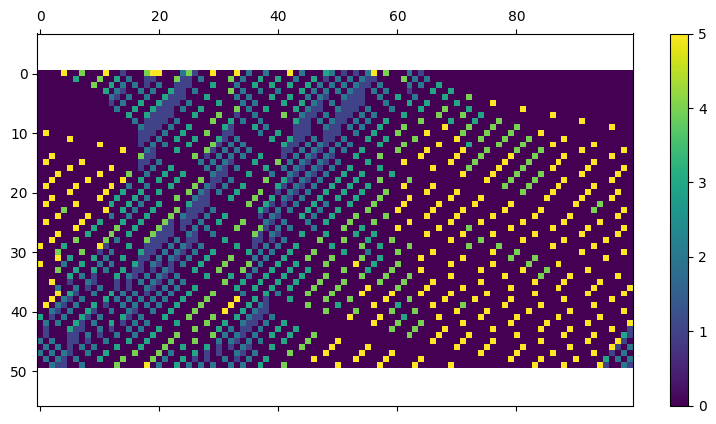

In [48]:
# changed the vmax to 5 and made some changes accordingly.

def traffic_simulator01(N, L, vmax ,p ,T):
    import numpy as np
    import matplotlib.pyplot as plt
    # create list of gaps
    gaps = [ np.random.randint(1, 1 + L//N) for i in range(N) ]
    # create list of positions
    pos = [ 0 for i in range(N) ]
    pos[0] = gaps[0]
    for i in range(1, N):
        pos[i] = pos[i-1] + gaps[i]
    # create list of velocities
    vel = [ np.random.randint(0, vmax+1) for i in range(N) ]
    
    # initialize traffic array
    traffic = np.zeros((T,L))

        # simulation proper
    for t in range(T):
        # draw to traffic array
        for i in range(N):
            if vel[i] == 0:
                traffic[t, pos[i]] = 1
            elif vel[i] == 1:
                traffic[t, pos[i]] = 2
            elif vel[i] == 2:
                traffic[t, pos[i]] = 3
            elif vel[i] == 3:
                traffic[t, pos[i]] = 4
            else:
                traffic[t, pos[i]] = 5
        # update traffic
        for i in range(N):
            # acceleration
            if vel[i] < vmax:
                vel[i] = vel[i] + 1
            # slowing down
            if i < N-1:
                if vel[i] >= pos[i+1] - pos[i]:
                    vel[i] = pos[i+1] - pos[i] - 1
            # impose periodic boundary condition on velocities
            else:
                if vel[i] >= (L - pos[i] - 1) + pos[0]:
                    vel[i] = (L - pos[i] - 1) + pos[0] - 1
            # random deceleration
            if vel[i] >= 1:
                if np.random.rand() < p:
                    vel[i] = vel[i] - 1
            # move vehicles
            pos[i] = pos[i] + vel[i]
            # impose periodic boundary condition on positions
            if pos[N-1] >= L:
                newpos0 = pos.pop(N-1)
                newvel0 = vel.pop(N-1)
                pos.insert(0, newpos0-L)
                vel.insert(0, newvel0)
    #draw the plot
    plt.matshow(traffic)
    plt.colorbar()
    plt.axis('equal')
    plt.show()
    
traffic_simulator01(25, 100, 5 ,0.2 ,50)

## Plotting the Fundamental Diagram

Choose a smaller region within the road, say $0 \leq x \leq 20$, as your measurement region.

Every 20 time steps, compute the density $\rho$, which is the number of vehicles in this region divided by 20, and the average velocity $\bar{v}$ over all vehicles in this region.

Collect a large number of points $(\rho, \bar{v})$, and plot the scatter diagram of $\bar{v}$ against $\rho$. This is called the fundamental diagram of vehicular traffic.

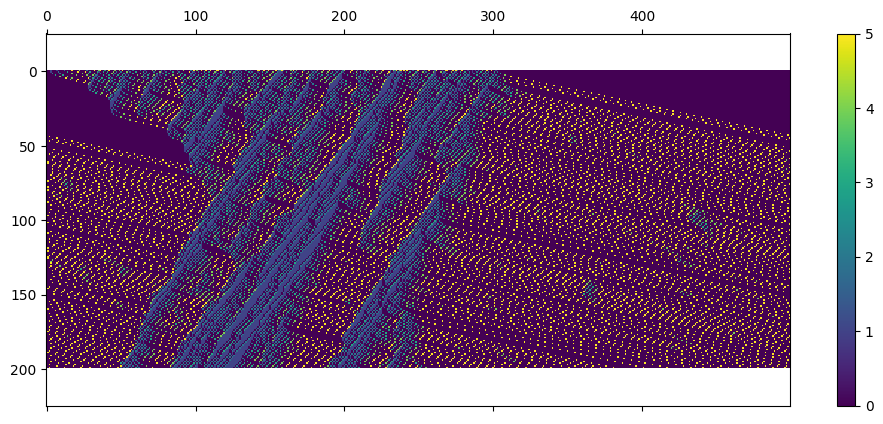

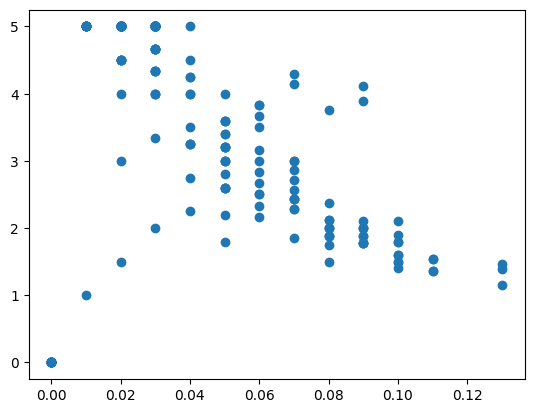

[[(0.2, 2.25) (0.3, 3.8333333333333335) (0.3, 3.6666666666666665)
  (0.3, 2.5) (0.25, 3.0) (0.35, 4.285714285714286)
  (0.35, 2.2857142857142856) (0.45, 4.111111111111111) (0.25, 3.6)
  (0.35, 3.0) (0.3, 3.8333333333333335) (0.4, 3.75)
  (0.35, 4.142857142857143) (0.45, 3.888888888888889)
  (0.35, 2.7142857142857144) (0.05, 1.0) (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)
  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0) (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)]
 [(0.0, 0.0) (0.0, 0.0) (0.35, 2.2857142857142856) (0.25, 2.6)
  (0.25, 2.2) (0.4, 2.375) (0.3, 2.3333333333333335) (0.4, 2.0)
  (0.4, 1.875) (0.35, 2.4285714285714284) (0.2, 2.75) (0.45, 2.0)
  (0.35, 2.857142857142857) (0.45, 1.8888888888888888) (0.3, 2.5)
  (0.2, 4.25) (0.15, 5.0) (0.05, 5.0) (0.1, 5.0) (0.05, 5.0) (0.0, 0.0)
  (0.0, 0.0) (0.0, 0.0) (0.0, 0.0) (0.0, 0.0)]
 [(0.0, 0.0) (0.0, 0.0) (0.0, 0.0) (0.0, 0.0) (0.4, 1.5)
  (0.55, 1.5454545454545454) (0.15, 4.0) (0.4, 2.0)
  (0.45, 2.111111111111111) (0.2, 3.25) (0.5, 1.4) (0.2, 3.25)
  (0.45, 1.777777

In [93]:
def traffic_simulator02(N, L, vmax ,p ,T):
    import numpy as np
    from statistics import mean
    import matplotlib.pyplot as plt
    # create list of gaps
    gaps = [ np.random.randint(1, 1 + L//N) for i in range(N) ]
    # create list of positions
    pos = [ 0 for i in range(N) ]
    pos[0] = gaps[0]
    for i in range(1, N):
        pos[i] = pos[i-1] + gaps[i]
    # create list of velocities
    vel = [ np.random.randint(0, vmax+1) for i in range(N) ]
    
    # initialize traffic array
    traffic = np.zeros((T,L))

        # simulation proper
    for t in range(T):
        # draw to traffic array
        for i in range(N):
            if vel[i] == 0:
                traffic[t, pos[i]] = 1
            elif vel[i] == 1:
                traffic[t, pos[i]] = 2
            elif vel[i] == 2:
                traffic[t, pos[i]] = 3
            elif vel[i] == 3:
                traffic[t, pos[i]] = 4
            else:
                traffic[t, pos[i]] = 5
        # update traffic
        for i in range(N):
            # acceleration
            if vel[i] < vmax:
                vel[i] = vel[i] + 1
            # slowing down
            if i < N-1:
                if vel[i] >= pos[i+1] - pos[i]:
                    vel[i] = pos[i+1] - pos[i] - 1
            # impose periodic boundary condition on velocities
            else:
                if vel[i] >= (L - pos[i] - 1) + pos[0]:
                    vel[i] = (L - pos[i] - 1) + pos[0] - 1
            # random deceleration
            if vel[i] >= 1:
                if np.random.rand() < p:
                    vel[i] = vel[i] - 1
            # move vehicles
            pos[i] = pos[i] + vel[i]
            # impose periodic boundary condition on positions
            if pos[N-1] >= L:
                newpos0 = pos.pop(N-1)
                newvel0 = vel.pop(N-1)
                pos.insert(0, newpos0-L)
                vel.insert(0, newvel0)
    
    L_bins = int(L/20) 
    T_bins = int(T/20) 
    
    x = []
    y = [] 
    density = np.zeros((T_bins ,L_bins ), object)

    for t in range(T_bins):
        for l in range(L_bins):
            car_num = 0
            vol_list = []

            #count the number of cars in that range 20 and create a list of their velocities.
            for i in traffic[t*20 , l*20:(l+1)*20]:
                if not  i == 0 :
                    car_num += 1
                    vol_list.append(i)
                    
            #turn the nan to zero
            if len(vol_list) == 0 :
                vol_list.append(0)   
                    
            x.append(car_num/N)
            y.append(np.average(vol_list))
            
            tuple1 = (car_num/20, np.average(vol_list))
            density[t,l] = tuple1

    #draw the plot
    plt.matshow(traffic)
    plt.colorbar()
    plt.axis('equal')
    plt.show()
    
    
    
    #draw the fundamental diagram of vehicular traffic
    plt.scatter(x,y)
    plt.show()
    
    #print("density" , x, sum(x))
    #print("mean veloccity:",y)
    print(density)
    
    
traffic_simulator02(100, 500, 5 ,0.2 ,200)

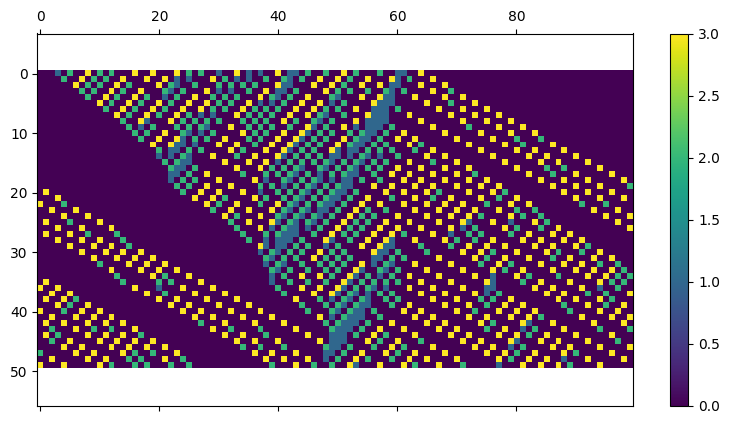

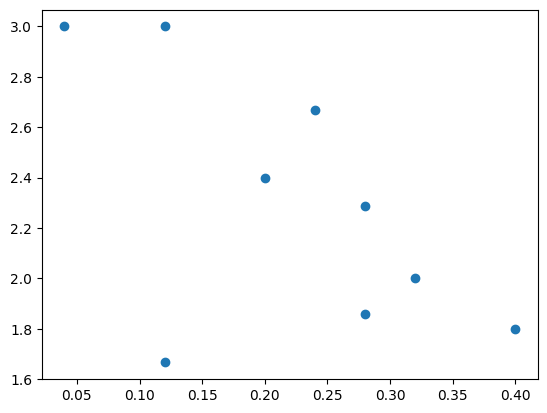

density [0.28, 0.28, 0.32, 0.12, 0.0, 0.04, 0.2, 0.4, 0.24, 0.12] 2.0
mean veloccity: [2.2857142857142856, 1.8571428571428572, 2.0, 1.6666666666666667, nan, 3.0, 2.4, 1.8, 2.6666666666666665, 3.0]
[[(0.35, 2.2857142857142856) (0.35, 1.8571428571428572) (0.4, 2.0)
  (0.15, 1.6666666666666667) (0.0, nan)]
 [(0.05, 3.0) (0.25, 2.4) (0.5, 1.8) (0.3, 2.6666666666666665)
  (0.15, 3.0)]]


In [78]:
    L_bins = int(L/20) 
    T_bins = int(T/20) 
    
    x = []
    y = [] 
    density = np.zeros((T_bins ,L_bins ), object)

    for t in range(T_bins):
        for l in range(L_bins):
            car_num = 0
            vol_list = []

            #count the number of cars in that range 20 and create a list of their velocities.
            for i in traffic[t*20 , l*20:(l+1)*20]:
                if not  i == 0 :
                    car_num += 1
                    vol_list.append(i)
                    
                        
            x.append(car_num/N)
            y.append(np.average(vol_list))
            
            tuple1 = (car_num/20, np.average(vol_list))
            density[t,l] = tuple1

    #draw the plot
    plt.matshow(traffic)
    plt.colorbar()
    plt.axis('equal')
    plt.show()
    
    #draw the fundamental diagram of vehicular traffic
    plt.scatter(x,y)
    plt.show()
    
    print("density" , x, sum(x))
    print("mean veloccity:",y)
    print(density)

In [72]:
a = traffic[0, 0:20]
type(a[3])

numpy.float64

In [121]:
type(pos[8])

int

# Further Explorations

## Two Lanes and Overtaking

Most roads have more than one lane, and allows overtaking to occur.

Think about how you would modify the simplest NS model shown here, so that you can simulate two-lane vehicular traffic.

Besides the additional complication for specifying the positions of vehicles, you will also need to add new rules, so that a vehicle can make use of the second lane to overtake another vehicle.

## City Traffic and Traffic Lights

In this session, we have only discussed vehicular traffic in 1D. Naturally, in a city, vehicular traffic is 2D, on a grid of criss-crossing roads.

Besides this challenge to programming the NS model, city traffic is also frequently regulated by traffic lights. Again, think of the rules you need to perform city traffic simulations.